# Final Deliverable - Exploring the Cervical Cancer Dataset

## Importance:
   All women are at risk for cervical cancer. Although cervical cancer is highly preventable through routine pap-smears, cervical cancer is responsible for approximately 4,000 deaths in the United States, and 300,000 deaths worldwide, annually ([American Cancer Society](https://www.cancer.org/cancer/cervical-cancer/about/key-statistics.html), 2019). There are factors that may increase a woman’s risk of developing cervical cancer. The main factor is infection with Human Papillomavirus, abbreviated as HPV ([Cancer.net](https://www.cancer.net/cancer-types/cervical-cancer/risk-factors), 2019). There are other factors that are more indirectly connected to cervical cancer – most are diseases/activities that prevent the immune system from clearing the virus ([Cancer.net](https://www.cancer.net/cancer-types/cervical-cancer/risk-factors), 2019). The virus then replicates, and mutates cervical cells causing dysplasia, and ultimately cancer if it is not caught early. Many factors that may be responsible for heightening risk of cervical cancer are included in a [dataset](https://www.kaggle.com/loveall/cervical-cancer-risk-classification) provided by Kaggle. It is important to utilize data science and historical data to examine these risk factors and their association with cervical cancer to learn more about it. It is especially important as hundreds and thousands of women die each year, for a disease that is preventable. 

## Outline:
#### 1. Data observation
#### 2. Data cleaning/preprocessing
#### 3. Data exploration/visualization
#### 4. Conclusion

## 1. Data observation
* Import packages and read dataset
* Learn about dataset

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Data from:
https://www.kaggle.com/loveall/cervical-cancer-risk-classification

In [2]:
# Read data using pandas

df = pd.read_csv('C:/Users/kathu/Desktop/kag_risk_factors_cervical_cancer.csv')
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
# Learn more about the dataset and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

#### Observations: 
There are many objects (indicating yes/no as 1/0) and integers. It is interesting that some objects would be expected to be integers and vice versa! Additionally, all though all objects are "non-null" - they contain '?' for unknown values, which is why we see no null values. 

## 2. Data Cleaning/Preparation
* Replace '?' values with NaN
* Replace/remove null values
* convert objects to numeric

In [4]:
# Replace ? with NaN

dfna = df.replace('?', np.nan)

In [5]:
dfna.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

#### Observation: 
We have a number of null values, but we need to convert the data to numeric first, so we can fill the null values rather than drop them.

In [6]:
# Temporary save
df = dfna
# Convert data to numeric for computation
df = df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

#### Next, 
We will fill the NaN values. We will use the median value for continuous values, and automatically fill in 1 for categorical values. This code and reasoning behind filling the values is provided by the author who made this [kernel](https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models). 
* We use the _median_ for continuous values so they are not affected by outliers.
* We use _1_ for categorical values as they are the least common **however**, this may not be entirely accurate for all categories. I am going to fill in 0 for IUD and IUD years because it is not as common. For the purpose of this course, we are keeping it simple and focusing on playing with the data and drawing any conclusion. In the future it would be great to spend more time researching the appropriate values!


In [7]:
# Fill NaN values.
# For continuous values, use median value
# For categorical - fill 1

# Continuous:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # suggested to use 0 as value for this
df['IUD (years)'] = df['IUD (years)'].fillna(0) # also suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

The reason why I am not dropping all NaN variables is because I do not want to lose too much data.
I followed the coding from kernel: https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models

In [8]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Great - no null values!
Time to look at summary statistics.

## 3. Data exploration/visualization
#### Now we can do some exploration on the data
* Summary Statistics
* Shape/Size of Data Frame
* Explore distribution of variables
* Explore correlation using a heat map
* Explore additional observations

In [10]:
# Summary statistics
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.158508,1.201241,0.446278,0.686480,2.035331,0.096737,...,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.365430,4.060623,2.210351,0.464194,3.567040,0.295771,...,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.shape

(858, 36)

In [12]:
df.size

30888

We have 858 rows and 37 columns.
Aka we have 858 observations/records and 37 variables. 

### Visualizing distribution of data 
Here we will use Seaborn (sns) for visualization. My code is based off of the [kernel](https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models) previously cited, but I added the number of packs smoked per year.

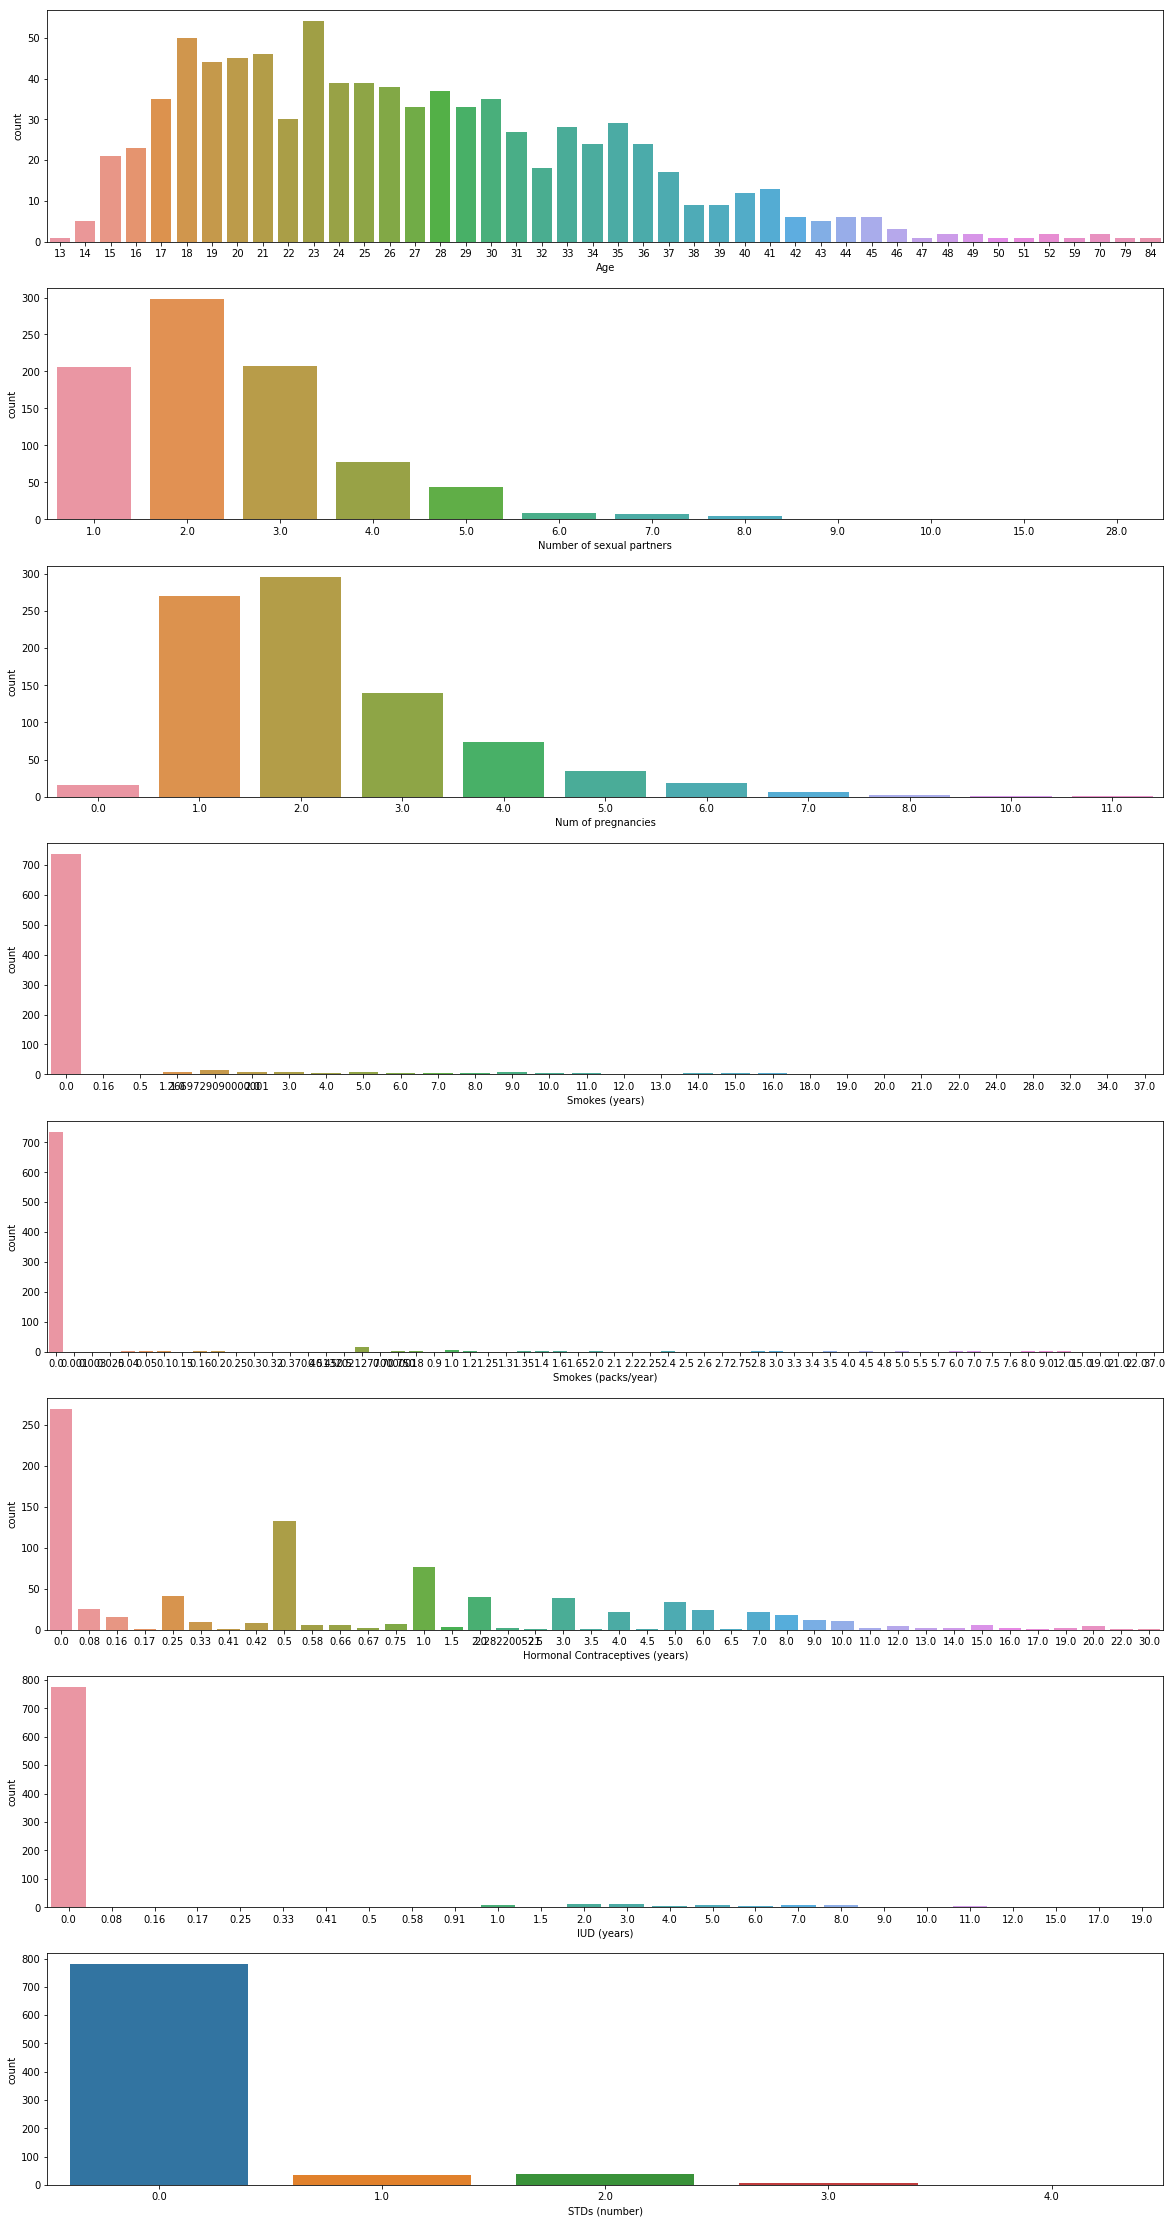

In [13]:
# Using sns to explore the distribution of data with continuous variables

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize = (20,40))

sns.countplot(x = 'Age', data = df, ax = ax1)
sns.countplot(x = 'Number of sexual partners', data = df, ax = ax2)
sns.countplot(x = 'Num of pregnancies', data = df, ax = ax3)
sns.countplot(x = 'Smokes (years)', data = df, ax = ax4)
sns.countplot(x = 'Smokes (packs/year)', data = df, ax = ax5)
sns.countplot(x = 'Hormonal Contraceptives (years)', data = df, ax = ax6)
sns.countplot(x = 'IUD (years)', data = df, ax = ax7)
sns.countplot(x = 'STDs (number)', data = df, ax = ax8)


### Observations:
* Age has a fairly normal distribution, but right-skewed
    
    - This could be due to a lower boundary of the data set (i.e. we do not typically collect data on children in this case, as it involves sexual activity that most people under the age of 13 would not experience or see a doctor for). Typically, women recieve annual pap-smears after they are sexually active or when they turn 21. Thus, we have more data from women ranging from 17 years of age to mid-late 40s. 

* Number of pregnancies and sexual partners is right-skewed as well.
    - Records of number of sexual partners may be right-skewed for a variety of reasons. One reason may be that a patient does not report this number (because it, unfortunately, is highly stigmatizing for women **still**). 
    - Records of number of pregnancies is likely right-skewed because it may not be as common to have more than 5 children. Additionally, this dataset is likely not representative of the population. 



### Explore possible correlations

Here we use seaborn again. We define k as the number of variables for the heat map. Here I have modified the map from this [kernel](https://www.kaggle.com/atakansoztekin/cancer-data-analysis-and-model-implementation), but I used age as the center variable first. 

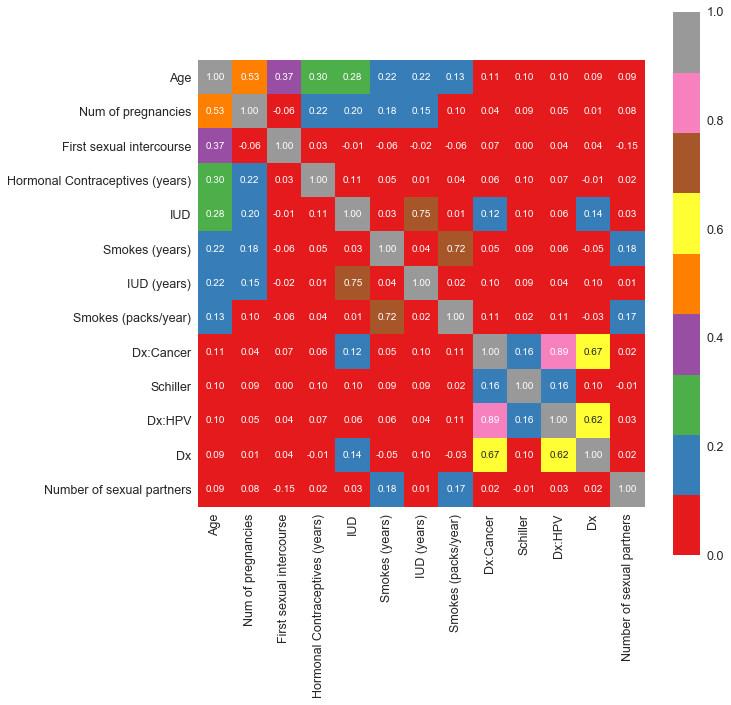

In [14]:
corr_matrix = df.corr()
# Define number of variables for heatmap
k = 15

columns = corr_matrix.nlargest(k, 'Age')['Age'].index

columns = columns.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

corr_m = df[columns].corr()

plt.figure(figsize=(10,10))

sns.set(font_scale = 1.25)

heat_map = sns.heatmap(corr_m, cbar = True, cmap = 'Set1', annot = True, vmin = 0, vmax =1, square = True, fmt='.2f', annot_kws={'size':10}, yticklabels = columns.values, xticklabels=columns.values)

plt.show()

We will now look at correlations in relation to hormonal contraceptives. 

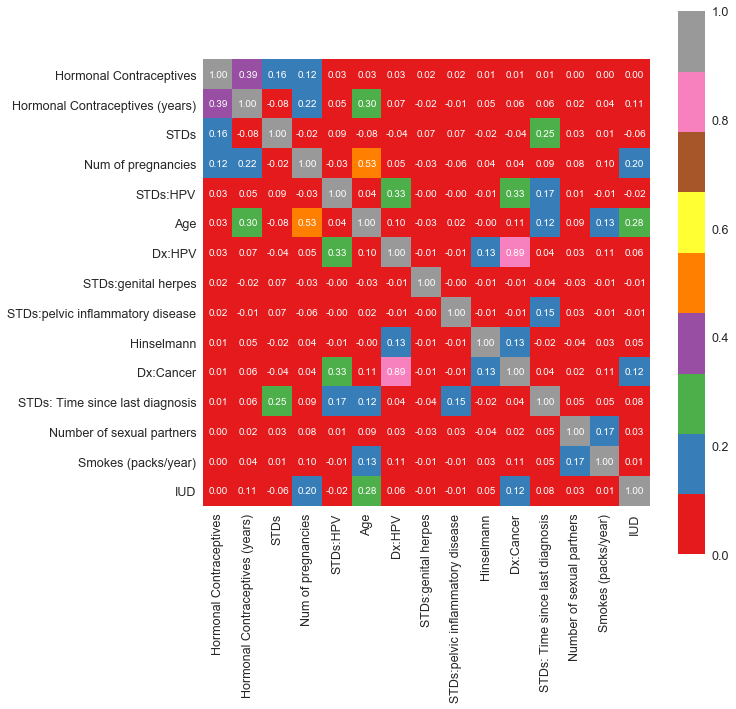

In [17]:
corr_matrix = df.corr()

k = 15

columns = corr_matrix.nlargest(k, 'Hormonal Contraceptives')['Hormonal Contraceptives'].index

#columns = columns.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
# Did not need to drop this because it was already dropped previously
corr_m = df[columns].corr()

plt.figure(figsize=(10,10))

sns.set(font_scale = 1.25)

heat_map = sns.heatmap(corr_m, cbar = True, cmap = 'Set1', annot = True, vmin = 0, vmax =1, square = True, fmt='.2f', annot_kws={'size':10}, yticklabels = columns.values, xticklabels=columns.values)

plt.show()

### Observations/Comments
This correlation heat map can help figure out how to better preprocess the data. For example, [Atakan Soztekin](https://www.kaggle.com/atakansoztekin/cancer-data-analysis-and-model-implementation) used this heat map to see how the diagnosis data may be affected by NaN values/filled values. He used the heatmap on the full/original dataset to fill NaN values with correlated features. For this use, I am simply playing around with the data I have already cleaned, and exploring these correlations as is. 

**Observations at a glance**:
1. Having been diagnosed with HPV has a 0.89 correlation to cervical cancer.
2. Having an IUD has some correlation to cancer, but not much.

##### Correlations to HPV:
There are two variables related to HPV - which are different: **STDs:HPV** and **Dx:HPV**.
Just by looking at the correlation, we can see they differ because STDs:HPV has a 0.33 correlation to cervical cancer diagnosis. From this I can assume that this variable is indicating whether or not a patient has had HPV at some point in their life. Having the diagnosis of HPV likely means that the person had been diagnosed with HPV at the time they were diagnosed with cancer. This indicates that those with cervical cancer had an un-monitored HPV infection and thus developed cancer. **This is one example of how you can derive meaning from data, without external context!** 

**There is still more that can be learned/explored from this heatmap!** 

This heatmap shows correlations in other places.
For example, if the patient is older than the sample mean the patient may take contraceptives.
Additionally, lower mean number of pregnancies they may take contreceptives.

## More visualization
Here we will be exploring more data. The main purpose is to explore different simple plotting techniques and practicing statistical analysis learned in our data science course. 

#### Exploring patients who smoked cigarrettes.

First I want to look into data on smoking and see the respective frequencies.

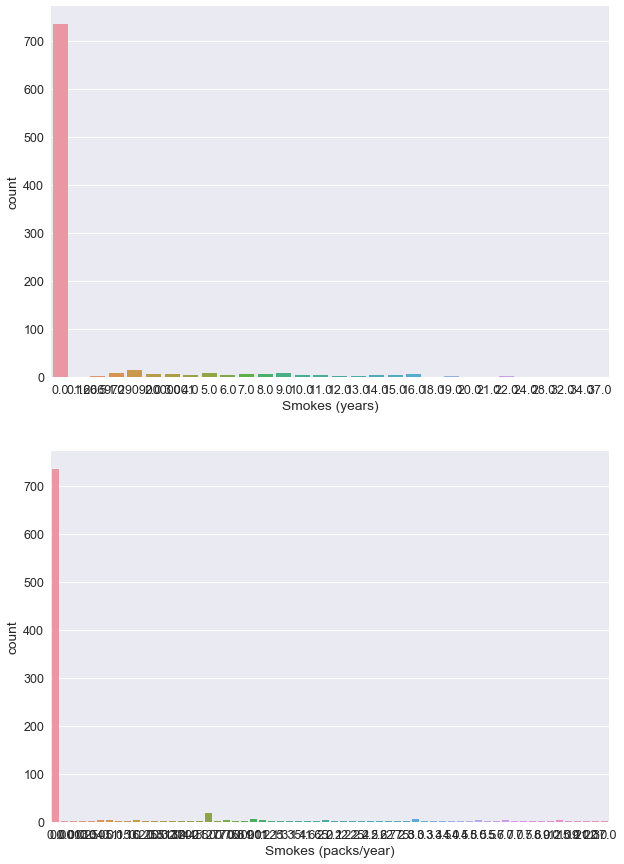

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,15))

sns.countplot(x = 'Smokes (years)', data = df, ax = ax1)
sns.countplot(x = 'Smokes (packs/year)', data = df, ax = ax2)


This is hard to read - as it is skewed by patients who don't smoke. Here we will attempt to remove those who don't smoke by making a new dataframe, and then making another with those who smoke (i.e. smokes = 1)

In [30]:
# Hard to read this data, and it's skewed by those who don't smoke in the first place.

# Make new df for smokers

df_df = pd.DataFrame(df)
df_smokers = df_df[["Smokes","Smokes (years)", "Smokes (packs/year)"]]
df_smokers.head(5)

,Smokes,Smokes (years),Smokes (packs/year)
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,37.0,37.0
4,0.0,0.0,0.0


In [31]:
df_smokers = df_smokers.sort_values("Smokes")
df_smokers.head(5)

,Smokes,Smokes (years),Smokes (packs/year)
0,0.0,0.0,0.0
532,0.0,0.0,0.0
533,0.0,0.0,0.0
534,0.0,0.0,0.0
535,0.0,0.0,0.0


In [32]:
df_smokers.tail(5)

,Smokes,Smokes (years),Smokes (packs/year)
497,1.0,8.0,2.00
125,1.0,10.0,1.00
704,1.0,5.0,2.50
669,1.0,0.0,0.00
428,1.0,1.0,0.25


It appears that this data frame was sorted. Now we will attempt to remove non-smokers.

In [34]:
# remove those who don't smoke
df_smokers = df_smokers[df_smokers['Smokes']>0]
df_smokers.head()

,Smokes,Smokes (years),Smokes (packs/year)
781,1.0,0.0,0.0
773,1.0,0.0,0.0
774,1.0,28.0,7.0
770,1.0,0.0,0.0
446,1.0,6.0,1.2


In [35]:
df_smokers.tail()

,Smokes,Smokes (years),Smokes (packs/year)
497,1.0,8.0,2.00
125,1.0,10.0,1.00
704,1.0,5.0,2.50
669,1.0,0.0,0.00
428,1.0,1.0,0.25


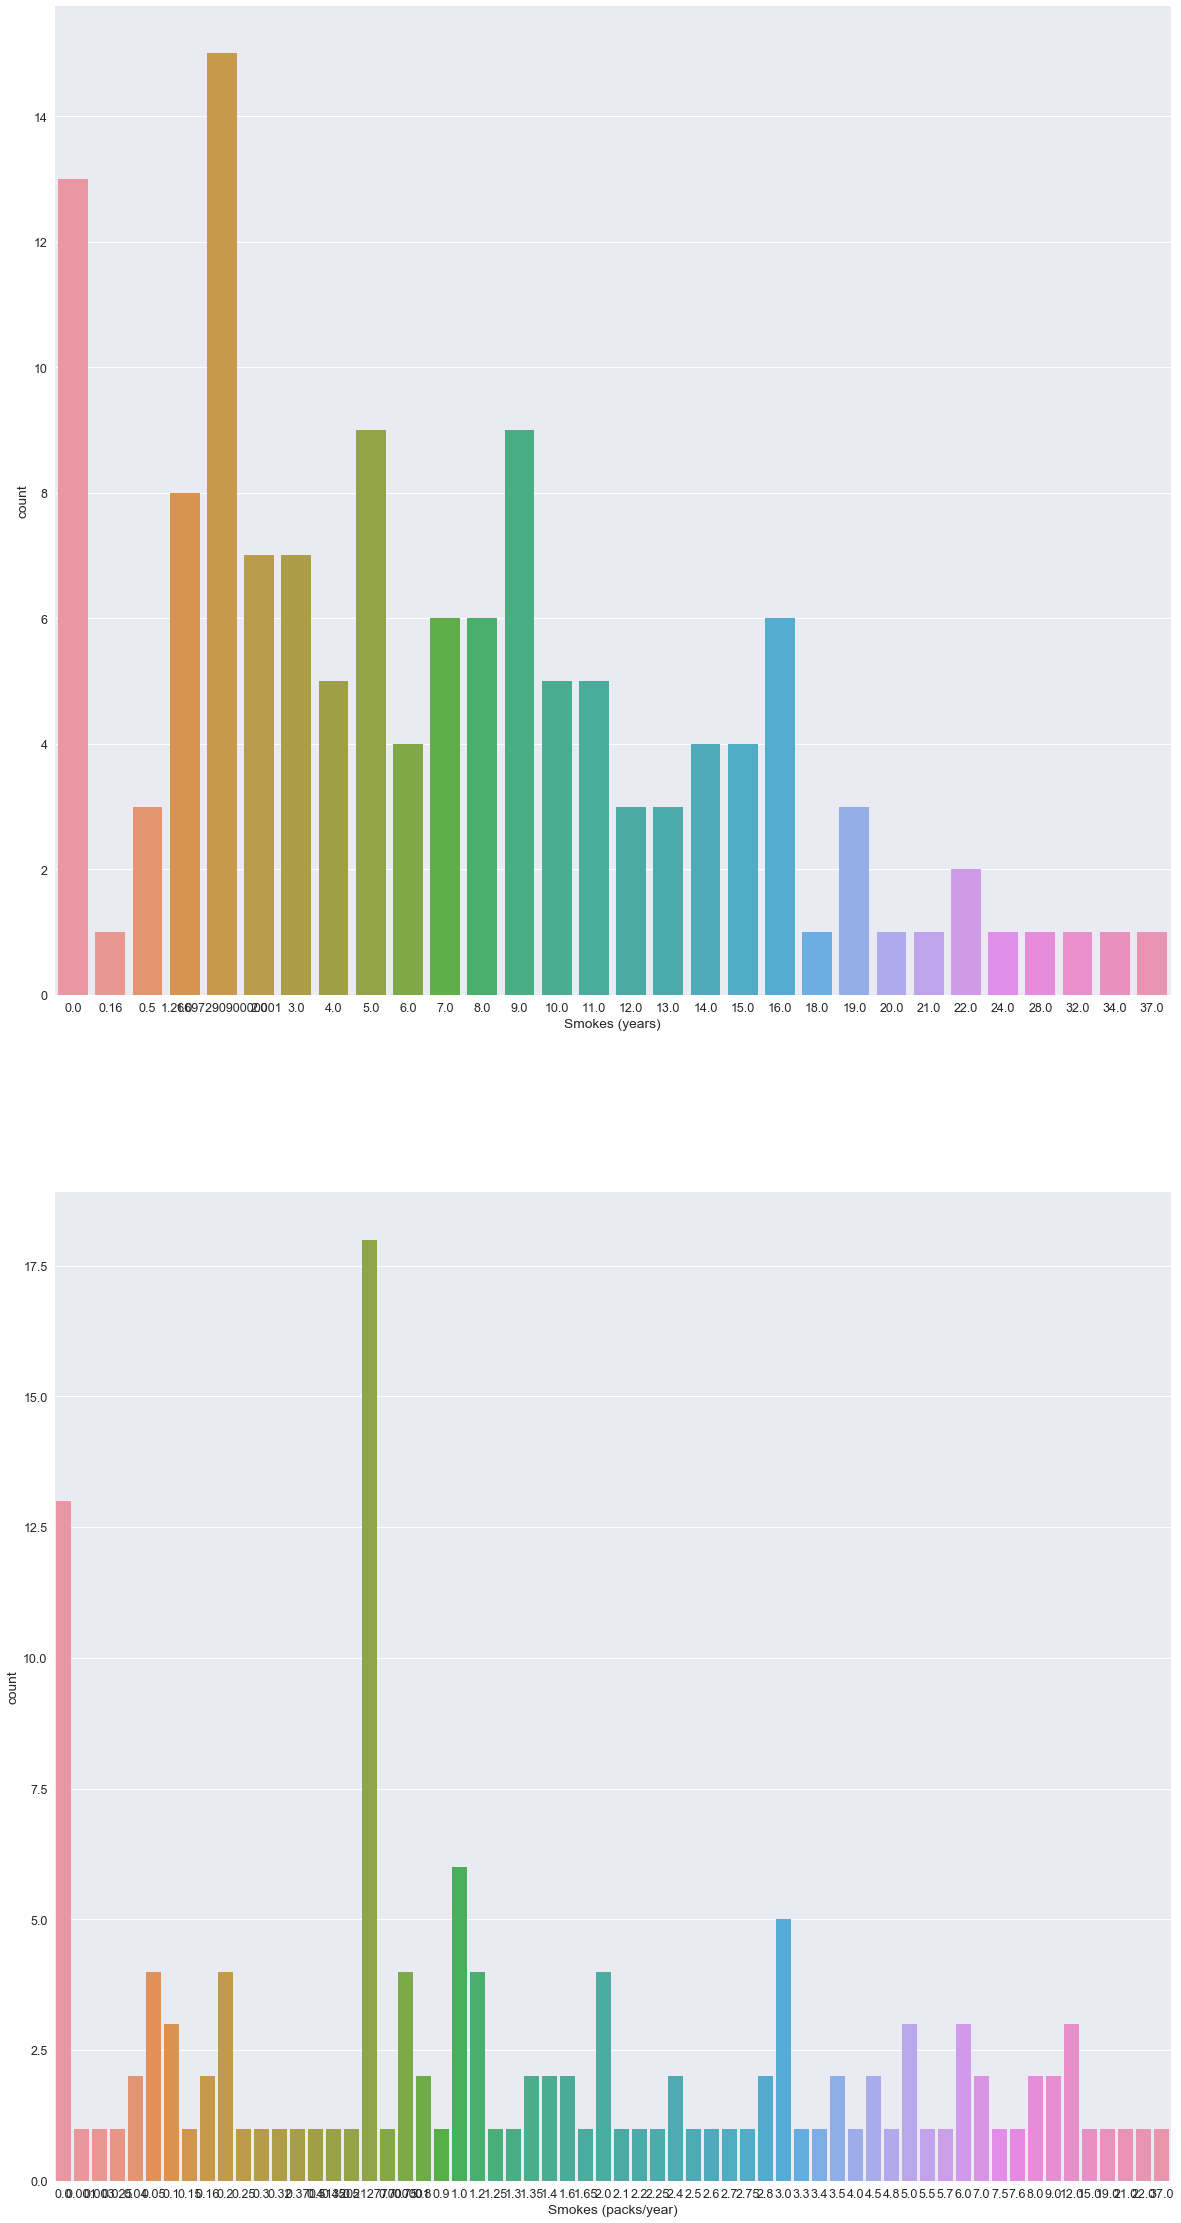

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20,40))

sns.countplot(x = 'Smokes (years)', data = df_smokers, ax = ax1)
sns.countplot(x = 'Smokes (packs/year)', data = df_smokers, ax = ax2)

This looks much better, but it still shows people who don't smoke. We will try another method.

In [69]:
# remove those who don't smoke
df_smokers2 = df_smokers[df_smokers['Smokes']==1]
df_smokers2.head()

,Smokes,Smokes (years),Smokes (packs/year)
781,1.0,0.0,0.0
773,1.0,0.0,0.0
774,1.0,28.0,7.0
770,1.0,0.0,0.0
446,1.0,6.0,1.2


Repeat visualization with new data frame df_smokers2

In [70]:
#fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20,40))

#sns.countplot(x = 'Smokes (years)', data = df_smokers2, ax = ax1)
#sns.countplot(x = 'Smokes (packs/year)', data = df_smokers2, ax = ax2)

The value 0 still remains. Will try one more addition.

In [71]:
# remove those who don't smoke
df_smokers3 = df_smokers[df_smokers['Smokes']!=0]
df_smokers3.head()

,Smokes,Smokes (years),Smokes (packs/year)
781,1.0,0.0,0.0
773,1.0,0.0,0.0
774,1.0,28.0,7.0
770,1.0,0.0,0.0
446,1.0,6.0,1.2


In [72]:
#fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20,40))

#sns.countplot(x = 'Smokes (years)', data = df_smokers3, ax = ax1)
#sns.countplot(x = 'Smokes (packs/year)', data = df_smokers3, ax = ax2)

Perhaps the 0 is for those who do only smoked for a short period of time here. Here I will drop those who smoke less than a pack per year and smoked for 0 years.

In [73]:
# remove those who don't smoke
df_smokers3 = df_smokers[df_smokers['Smokes (years)']!=0]
df_smokers3 = df_smokers3[df_smokers3['Smokes (packs/year)']!=0]
df_smokers3.head()

,Smokes,Smokes (years),Smokes (packs/year)
774,1.0,28.0,7.0
446,1.0,6.0,1.2
780,1.0,3.0,1.2
67,1.0,21.0,21.0
343,1.0,2.0,0.2


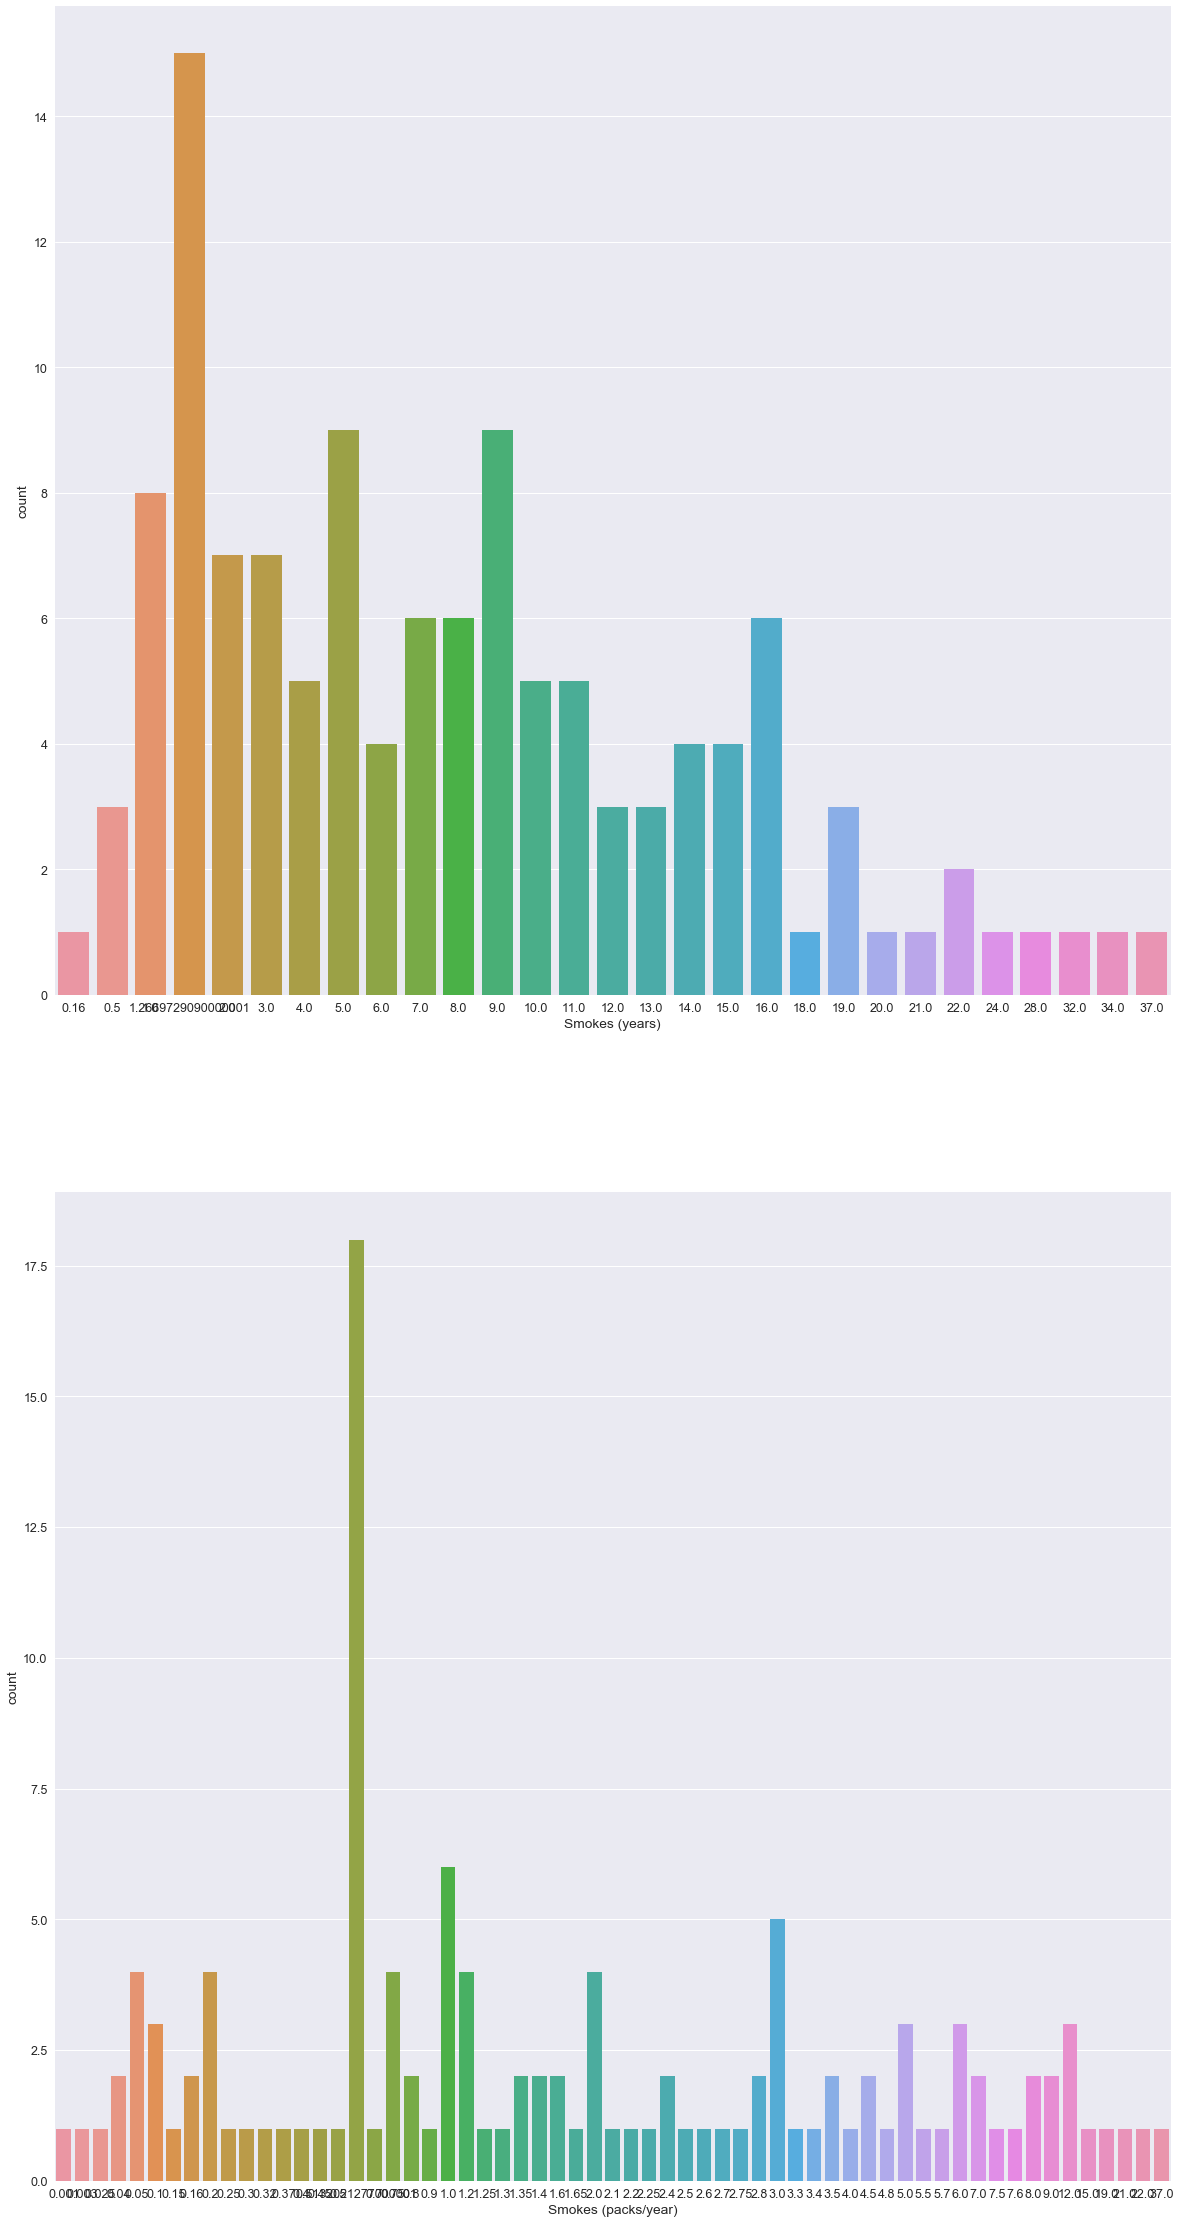

In [74]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20,40))

sns.countplot(x = 'Smokes (years)', data = df_smokers3, ax = ax1)
sns.countplot(x = 'Smokes (packs/year)', data = df_smokers3, ax = ax2)

Much better! Let's look at the summary statistics.

In [48]:
# Summary statistics for smokers only
df_smokers3.describe()

,Smokes,Smokes (years),Smokes (packs/year)
count,123.0,123.000000,123.000000
mean,1.0,8.379387,3.113062
std,0.0,7.428631,5.094095
min,1.0,0.160000,0.001000
25%,1.0,2.000000,0.513202
50%,1.0,7.000000,1.200000
75%,1.0,12.000000,3.350000
max,1.0,37.000000,37.000000


In [49]:
df_smokers3.mean()

Smokes                 1.000000
Smokes (years)         8.379387
Smokes (packs/year)    3.113062
dtype: float64

Look at distribution of data via boxplot

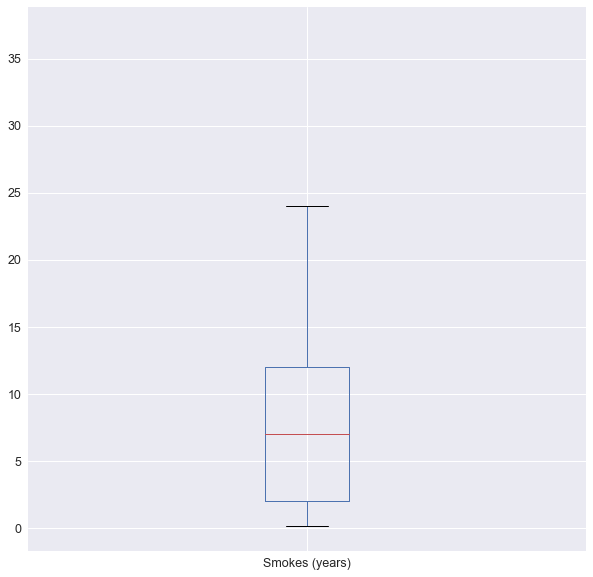

In [53]:
df_smokers3.boxplot("Smokes (years)", figsize=(10,10))

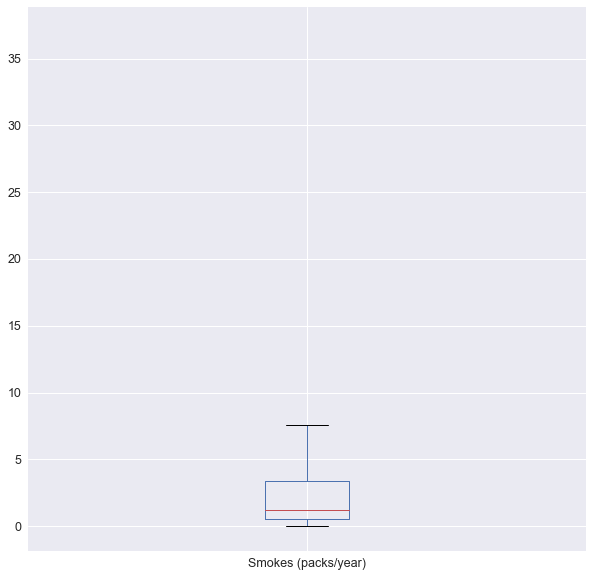

In [54]:
df_smokers3.boxplot("Smokes (packs/year)", figsize=(10,10))

### Observations:
It appears that the data is right skewed according to the box plots. 

Now let's take a look at what we have on cancer diagnosis!

### Cancer diagnosis

In [55]:
df_df[["Dx:Cancer"]].head(5)

,Dx:Cancer
0,0
1,0
2,0
3,1
4,0


In [56]:
df_df[["Dx:Cancer"]].shape

(858, 1)

In [57]:
df_smokers.shape

(136, 3)

We can compare the years someone has smoked for and their diagnosis using sns scatter plot with added regression.
Recall that df_df is the pandas DataFrame of our cleaned dataset.

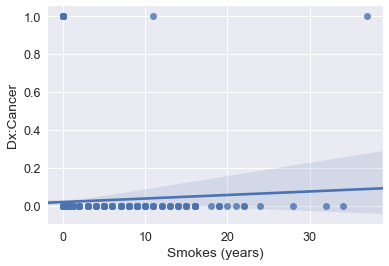

In [58]:
sns.regplot(x=df_df['Smokes (years)'], y=df_df['Dx:Cancer'])

### Observations/comments:
Had to use df_df rather than the dataframe containing smokers only because the shape must match. 
Not much insight can be gained from this. 

### Let's see what the scatterplot looks like with HPV diagnosis with respect to cancer diagnosis.

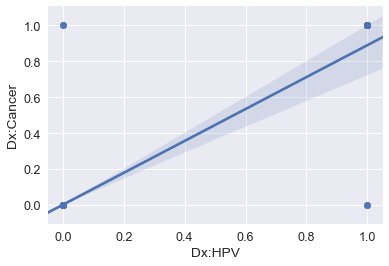

In [60]:
sns.regplot(x=df_df['Dx:HPV'], y=df_df['Dx:Cancer'])

In [68]:
df_df[df_df["Dx:Cancer"] == 1 ]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
3,52,5.0,16.0,4.0,1.0,37.0,37.00,1.0,3.00,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.00,0.0,0.00,0.0,...,4.0,3.0,1,0,1,1,0,0,0,0
23,40,1.0,20.0,2.0,0.0,0.0,0.00,1.0,15.00,0.0,...,4.0,3.0,1,0,1,0,1,1,0,1
64,38,2.0,15.0,4.0,0.0,0.0,0.00,1.0,16.00,0.0,...,4.0,3.0,1,0,1,0,0,1,0,1
188,27,5.0,19.0,2.0,0.0,0.0,0.00,1.0,3.00,0.0,...,4.0,3.0,1,0,1,1,0,0,1,0
335,29,2.0,18.0,4.0,0.0,0.0,0.00,0.0,0.00,0.0,...,4.0,3.0,1,0,1,1,0,1,1,1
432,31,3.0,19.0,1.0,0.0,0.0,0.00,0.0,0.00,1.0,...,4.0,3.0,1,0,0,1,0,0,0,0
578,19,1.0,18.0,1.0,0.0,0.0,0.00,1.0,1.00,0.0,...,4.0,3.0,1,0,1,1,1,1,1,1
610,21,2.0,18.0,3.0,0.0,0.0,0.00,0.0,0.00,1.0,...,4.0,3.0,1,0,1,1,1,1,0,1
669,38,3.0,22.0,2.0,1.0,0.0,0.00,1.0,3.00,1.0,...,4.0,3.0,1,0,1,1,0,1,0,0


In [75]:
# Going to try something different. 
df_data = df
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.158508,1.201241,0.446278,0.686480,2.035331,0.096737,...,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.365430,4.060623,2.210351,0.464194,3.567040,0.295771,...,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploring more variables
Code modified from [Huang, Peng-Hsuan](https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models) 

### Age and Hormonal Contraceptives

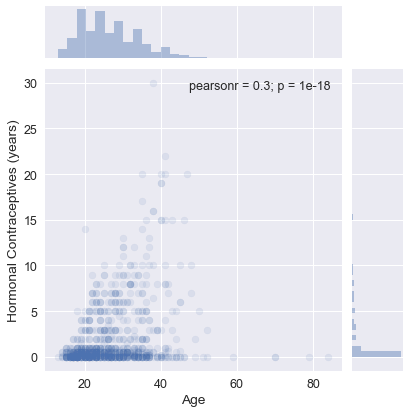

In [77]:
sns.jointplot(x = 'Age', y = 'Hormonal Contraceptives (years)', data = df, alpha = 0.1)

### Observations/Comments: It looks like patients around 40 years of age have used hormonal contraceptives for the longest period of time, which makes sense!

### Number of Pregnancies and Hormonal Contraceptives

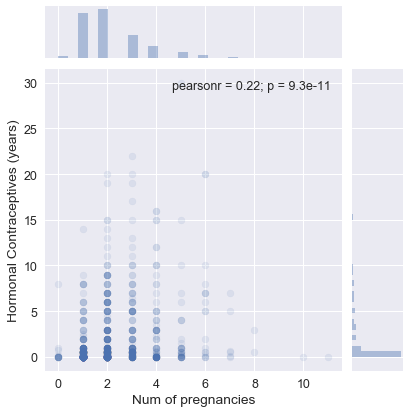

In [78]:
sns.jointplot(x = 'Num of pregnancies', y = 'Hormonal Contraceptives (years)', data = df, alpha = 0.1)

### Observations/Comments: This is hard to compare, because women tend to take contraceptives when they are not trying to have children. In other words, they discontinue use of contraceptives when they are trying, and re-continue after giving birth. 

### Cancer and HPV diagnosis

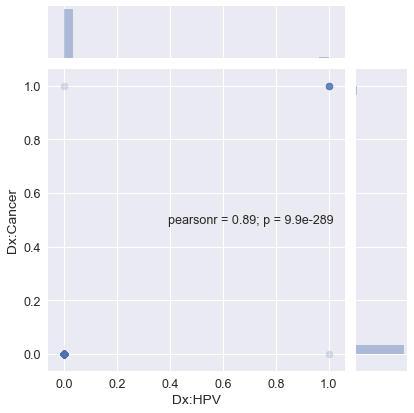

In [80]:
sns.jointplot(x = 'Dx:HPV', y = 'Dx:Cancer', data = df, alpha = 0.1)

### Observations/Comments: It seems like there is simply enough data or cases when someone has a cancer diagnosis. It does reveal that if you are diagnosed with cervical cancer, you probably had HPV as well. 

### Looking at various plots for age and biopsy

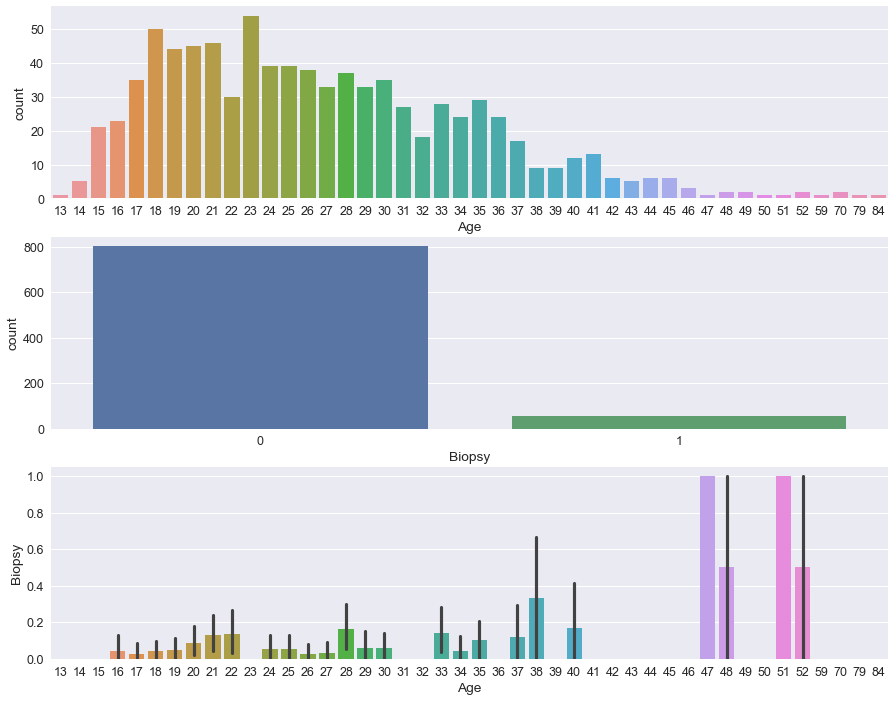

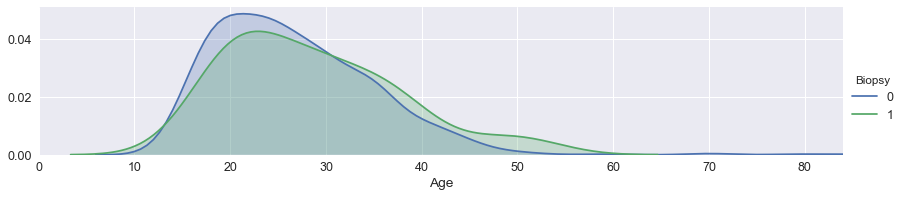

In [81]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Biopsy', data=df, ax=ax2)
sns.barplot(x='Age', y='Biopsy', data=df, ax=ax3)


facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

### Observations/Comments:

### Plots for Age and Dx:HPV

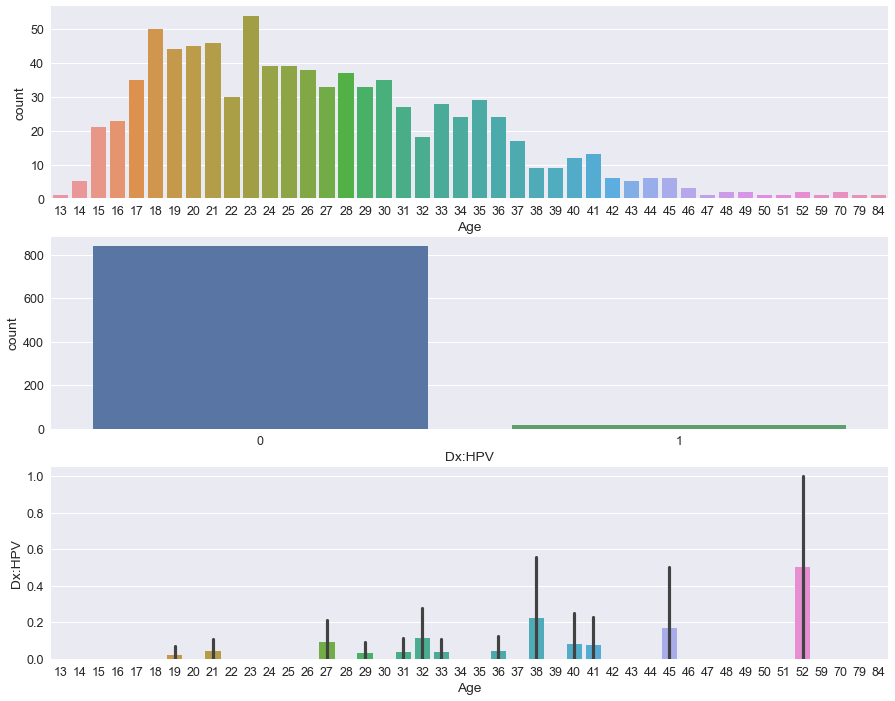

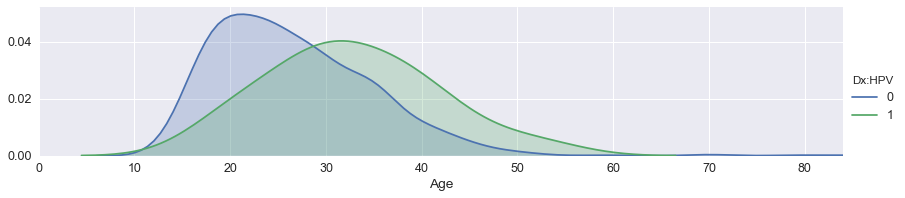

In [82]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Dx:HPV', data=df, ax=ax2)
sns.barplot(x='Age', y='Dx:HPV', data=df, ax=ax3)


facet = sns.FacetGrid(df, hue='Dx:HPV',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

### Observations/Comments: There are more people in this dataset who have not been diagnosed with HPV. It is hard to know what these results show because it is skewed. HPV Diagnosis is higher in adults around 30 years of age. 

# Conclusion:
I learned a lot about different visualization techniques, and how even datasets from Kaggle may not provide enough data to draw concrete correlations. I think this dataset was good for a beginner, but there does not seem to be enough patients with cancer to draw any information about risk factors with cervical cancer. This is just my opinion, and I am sure in the future, machine learning, or more knowledge with the topic, I could make better predictions or assumptions based on the data!